# Tarea  5  Algoritmos de Aprendizaje Supervisado 
---
## Estudiante: Gabriel Orlando Cuentas Torres
---
Dataset Regresión Lineal - Titanic 
---
1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.  
2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.
3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.
4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.
5. Entrenar el modelo configurando los diferentes hiperparámetros.
6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.
7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
8. Interpretar, analizar y documentar los resultados obtenidos.

## 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [239]:
#Cargar las librerias necesrias
import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

In [240]:
# Cargamos el dataset y mostramos las 50 primeras filas
Datos = pd.read_csv('./Titanic-Dataset.csv')

In [241]:
# Realizamos lectura de los Datos para el análisis exploratorio
Datos.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [242]:
# Descripción de los datos
Datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [243]:
Datos.shape

(891, 12)

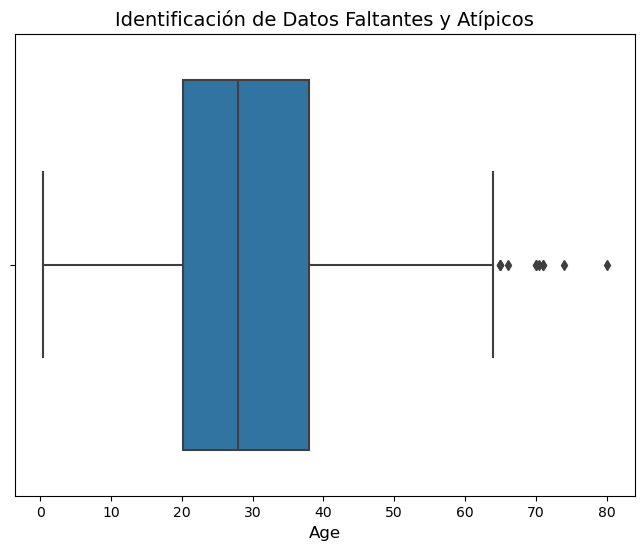

In [244]:
# Identificación de Datos Faltantes y Atípicos
plt.figure(figsize=(8, 6))
sns.boxplot(x=Datos['Age'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.show()

## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

In [245]:
Datos.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [246]:
Datos['Age'].isnull().value_counts()

Age
False    714
True     177
Name: count, dtype: int64

Se calcula la media de la columna 'Age' y se remplaza en los campos nulos o vacios

In [247]:
# Calcular la media de la columna 'Age'
mean_age = Datos['Age'].mean()

# Reemplazar los valores NaN en la columna 'Age' con la media
Datos['Age'].fillna(mean_age, inplace=True)

# Verificar que los valores NaN han sido reemplazados
print(Datos['Age'].isna().sum())
print(Datos.head(6))

0
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   

                                                Name     Sex        Age  \
0                            Braund, Mr. Owen Harris    male  22.000000   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                             Heikkinen, Miss. Laina  female  26.000000   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                           Allen, Mr. William Henry    male  35.000000   
5                                   Moran, Mr. James    male  29.699118   

   SibSp  Parch            Ticket     Fare Cabin Embarked  
0      1      0         A/5 21171   7.2500   NaN        S  
1      1      0          PC 17599  71.2833   C85        C  
2      0      0  STON/O2. 3101282   7.9

In [248]:
# Revisión de datos faltantes 
print("Cantidad de Registros con cero en Edad: ",Datos['Age'].isna().sum())

Cantidad de Registros con cero en Edad:  0


In [249]:
#Revisión del tipo de datos y datos faltantes
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

Características de interes para el agrupamiento:

* Sobrevivientes 'Survived'
* Clase Pasajero 'Pclass'
* Sexo 'Sex'
* Edad 'Age'

In [250]:
# Filtrar columnas del modelo 
Datos = Datos[["Survived","Pclass","Sex","Age"]]

In [251]:
# Revisión de los datos de las variables objetivo
Datos.head(10)

,Survived,Pclass,Sex,Age
0,0,3,male,22.000000
1,1,1,female,38.000000
2,1,3,female,26.000000
3,1,1,female,35.000000
4,0,3,male,35.000000
5,0,3,male,29.699118
6,0,1,male,54.000000
7,0,3,male,2.000000
8,1,3,female,27.000000
9,1,2,female,14.000000


In [252]:
# Mapear los valores de la columna 'Sex'
Datos['Sex'] = Datos['Sex'].map({'female': 1, 'male': 2})

# Verificar el cambio
print(Datos.head(10))

   Survived  Pclass  Sex        Age
0         0       3    2  22.000000
1         1       1    1  38.000000
2         1       3    1  26.000000
3         1       1    1  35.000000
4         0       3    2  35.000000
5         0       3    2  29.699118
6         0       1    2  54.000000
7         0       3    2   2.000000
8         1       3    1  27.000000
9         1       2    1  14.000000


## 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo. 

In [253]:
# Seleccionar las características (features) y la variable objetivo (target)
X = Datos.drop(columns='Survived', axis=1)  # Características
y = Datos['Survived']  # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar las dimensiones de los conjuntos resultantes
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (712, 3)
X_test shape: (179, 3)
y_train shape: (712,)
y_test shape: (179,)


## 5. Entrenar el modelo configurando los diferentes hiperparámetros.

In [254]:
modelo_regresion = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit (X_train , y_train)   
# Verificar el ajuste del modelo
print("Modelo entrenado correctamente")

Modelo entrenado correctamente


In [255]:
Prediccion = modelo_regresion.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación

In [256]:
print (y_test)

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64


In [257]:
print (Prediccion)

[0 0 0 1 1 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1]


## 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc

In [258]:
# Desempeño del modelo de regresión
print(classification_report(y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       105
           1       0.76      0.70      0.73        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



## 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

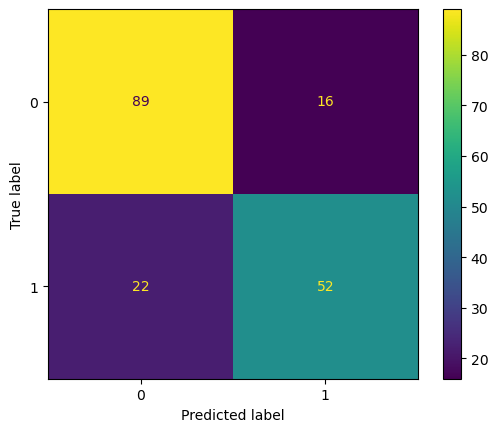

In [259]:
#Matrix de Confusión del modelo
cm=confusion_matrix(y_test,Prediccion)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

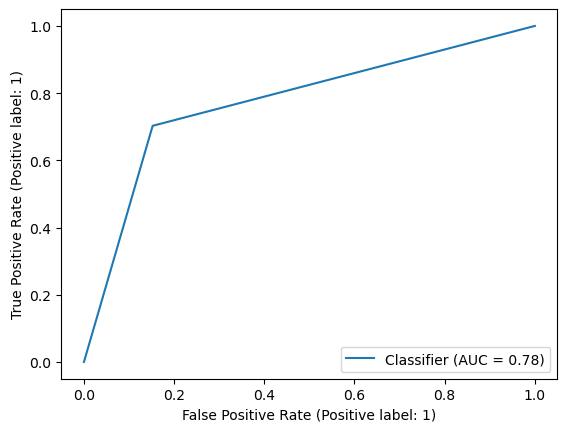

In [260]:
# Curva de precisón del modelo
RocCurveDisplay.from_predictions(y_test, Prediccion)
plt.show()

## 8. Interpretar, analizar y documentar los resultados obtenidos

Informe de Clasificación

Primero, consideremos el informe de clasificación que muestra varias métricas de evaluación del modelo:

* Precision (Precisión): La precisión es la proporción de verdaderos positivos sobre el total de instancias clasificadas como positivas. La precisión para la clase 0 es 0.80 y para la clase 1 es 0.76. Esto significa que cuando el modelo predice que un pasajero no sobrevivió (clase 0), es correcto el 80% de las veces, y cuando predice que un pasajero sobrevivió (clase 1), es correcto el 76% de las veces.

* Recall (Sensibilidad): La sensibilidad es la proporción de verdaderos positivos sobre el total de instancias que realmente son positivas. El recall para la clase 0 es 0.85 y para la clase 1 es 0.70. Esto indica que el modelo es mejor para identificar pasajeros que no sobrevivieron (clase 0) que para identificar pasajeros que sí sobrevivieron (clase 1).

* F1-Score: El F1-score es la media armónica de la precisión y la sensibilidad. El F1-score para la clase 0 es 0.82 y para la clase 1 es 0.73. Esto proporciona un equilibrio entre la precisión y el recall.

* Support (Soporte): El soporte es el número de ocurrencias de cada clase en el conjunto de datos. Hay 105 instancias de la clase 0 y 74 de la clase 1.

* Accuracy (Exactitud): La exactitud general del modelo es 0.79, lo que significa que el modelo clasifica correctamente el 79% de las instancias en el conjunto de prueba.

Matriz de Confusión

La matriz de confusión proporciona una representación más detallada de las predicciones del modelo:

    True Negatives (Verdaderos Negativos, TN): 89 pasajeros fueron correctamente clasificados como no sobrevivientes.
    False Positives (Falsos Positivos, FP): 16 pasajeros fueron incorrectamente clasificados como sobrevivientes.
    False Negatives (Falsos Negativos, FN): 22 pasajeros fueron incorrectamente clasificados como no sobrevivientes.
    True Positives (Verdaderos Positivos, TP): 52 pasajeros fueron correctamente clasificados como sobrevivientes.

Análisis

    Desempeño del Modelo: El modelo tiene una precisión general del 79%, lo cual es bastante bueno para un problema de clasificación binaria. Sin embargo, el desempeño es ligeramente mejor en la identificación de no sobrevivientes (clase 0) que de sobrevivientes (clase 1), como lo indican las métricas de recall y F1-score.

    Desbalance de Clases: El soporte muestra que hay un desbalance en las clases, con más pasajeros que no sobrevivieron (105) comparado con los que sí sobrevivieron (74). Este desbalance puede afectar las métricas de evaluación y la capacidad del modelo para generalizar.

    Precisión vs. Recall: Para la clase 1 (sobrevivientes), el recall es menor que la precisión, lo que indica que el modelo puede estar perdiendo algunos verdaderos positivos (FN). En contextos donde es crucial identificar todos los sobrevivientes posibles, este trade-off podría ser significativo.

    Matriz de Confusión: La matriz de confusión indica que hay un número moderado de falsos negativos y falsos positivos. Los falsos negativos (22) pueden ser más críticos en ciertos escenarios donde es importante identificar todos los sobrevivientes.

Conclusiones

El modelo de regresión logística muestra un buen desempeño general con una precisión del 79%. Sin embargo, hay un ligero sesgo hacia la clase no sobreviviente, con un recall más bajo para la clase sobreviviente. Se recomienda considerar técnicas adicionales para balancear las clases y mejorar la identificación de sobrevivientes, como la recolección de más datos, el uso de técnicas de sobremuestreo o submuestreo, o la implementación de modelos más complejos.